In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [210]:
data = pd.read_csv("/content/estaturas.csv")
data.tail()

,Estatura(metros),Edad(años)
48,1.64,39
49,1.70,33
50,1.65,31
51,1.68,34
52,1.71,29


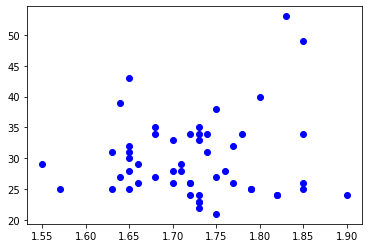

In [211]:
plt.scatter(data['Estatura(metros)'], data['Edad(años)'], c = 'b')
plt.show()

###Hard-clustering con K-means

In [212]:
def centroidesIniciales(k, df):

    centroides = []

    for c in range(k):
        c = np.random.choice(data.shape[0], 1)
        centroides.append((data.iloc[c]['Estatura(metros)'],data.iloc[c]['Edad(años)']))

    centroides = pd.DataFrame(centroides, columns = df.columns)

    return centroides

In [213]:
def calcError(a,b):
  error = np.square(np.sum((a-b)**2))
  
  return error 

In [214]:
def asignarCentroide(data, centroides):
  n = data.shape[0]
  cent_assignado = []
  cent_errores = []
  k = centroides.shape[0]


  for fila in range(0,n):
    errores = np.array([]) #errores de cada observacion respecto al centroide
    for cent in range(0,k):
      error = calcError(centroides.iloc[cent, :2], data.iloc[fila,:2])
      errores = np.append(errores, error)

    closest_cent =  np.where(errores == np.amin(errores))[0].tolist()[0] #se elige el centroide mas cercano
    centroid_error = np.amin(errores)

    cent_assignado.append(closest_cent) #asignar el centroide a la observacion
    cent_errores.append(centroid_error)

  return (cent_assignado,cent_errores)

#data_centro, data_error = asignarCentroide(data.iloc[:,:2] ,centroides)
#data['centroid'], data['error'] = asignarCentroide(data.iloc[:,:2] ,centroides)
#data[['centroid', 'error']].head()


In [234]:
def kmeans(data, k):
  centroides = centroidesIniciales(k, data) #se calculan centroides iniciales
  error = []
  flag = True
  i = 0

  while(flag):
    data['centroide'], iter_error = asignarCentroide(data,centroides)
    error.append(sum(iter_error))
    
    centroides = data.groupby('centroide').agg('mean').reset_index(drop = True) #recalcular 

    # verificando si el error decrece
    if(len(error)<2):
      flag = True
    else:
      if(round(error[i],3) !=  round(error[i-1],3)):
        flag = True
      else:
        flag = False
    i = i + 1 

  data['centroide'], iter_error = asignarCentroide(data,centroides)
  centroides = data.groupby('centroide').agg('mean').reset_index(drop = True)
  return data['centroide'], error[-1], centroides

###Soft-clustering con GMM

In [216]:
from sklearn.mixture import GaussianMixture

In [217]:
def GMM_clustering(data,k):
  gmm = GaussianMixture(n_components=k, random_state=0).fit(data.values)
  labels = gmm.predict(data.values)
  data['label'] = labels
  data.head()
  return data


###Experimentos para seleccionar k

#####Experimentos con K-Means

In [218]:
dataKmeansk1 =  data.copy()
colors = {0:'red', 1:'blue', 2:'green', 3:'purple', 4:'black'}

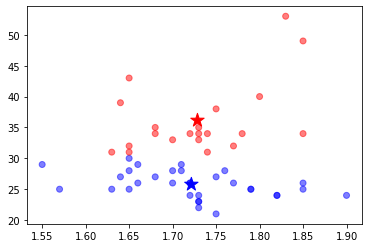

In [219]:
dataKmeansk1['centroide'], e1, centroidesList =  kmeans(dataKmeansk1,2)
plt.scatter(dataKmeansk1.iloc[:,0], dataKmeansk1.iloc[:,1],  marker = 'o', c = dataKmeansk1['centroide'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroidesList.iloc[:,0], centroidesList.iloc[:,1],  marker = '*', s=200, 
           c = centroidesList.index.map(lambda x: colors[x]))

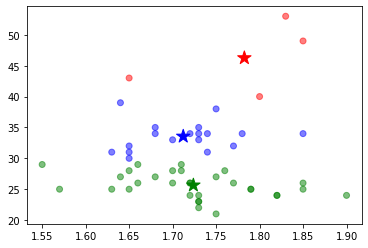

In [220]:
dataKmeansk2 =  data.copy()
dataKmeansk2['centroide'],e2, centroidesList2 =  kmeans(dataKmeansk2,3)
plt.scatter(dataKmeansk2.iloc[:,0], dataKmeansk2.iloc[:,1],  marker = 'o', c = dataKmeansk2['centroide'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroidesList2.iloc[:,0], centroidesList2.iloc[:,1],  marker = '*', s=200, 
           c = centroidesList2.index.map(lambda x: colors[x]))


In [221]:
centroidesList2

,Estatura(metros),Edad(años)
0,1.782500,46.250000
1,1.712222,33.555556
2,1.723871,25.645161


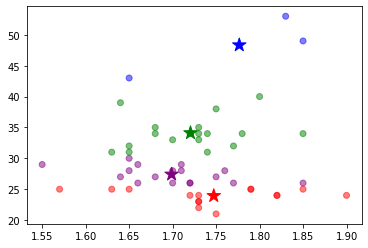

In [222]:
dataKmeansk3 =  data.copy()
dataKmeansk3['centroide'], e3, centroidesList3 =  kmeans(dataKmeansk3,4)
dataKmeansk3.head()
plt.scatter(dataKmeansk3.iloc[:,0], dataKmeansk3.iloc[:,1],  marker = 'o', c = dataKmeansk3['centroide'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroidesList3.iloc[:,0], centroidesList3.iloc[:,1],  marker = '*', s=200, 
           c = centroidesList3.index.map(lambda x: colors[x]))

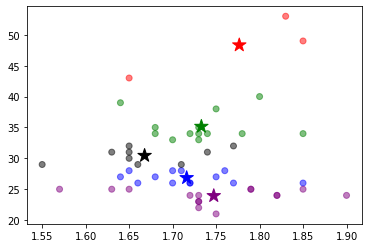

In [223]:
dataKmeansk4 =  data.copy()
dataKmeansk4['centroide'],e4, centroidesList4 =  kmeans(dataKmeansk4,5)
plt.scatter(dataKmeansk4.iloc[:,0], dataKmeansk4.iloc[:,1],  marker = 'o', c = dataKmeansk4['centroide'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroidesList4.iloc[:,0], centroidesList4.iloc[:,1],  marker = '*', s=200, 
           c = centroidesList4.index.map(lambda x: colors[x]))

#####Experimentos con GMM

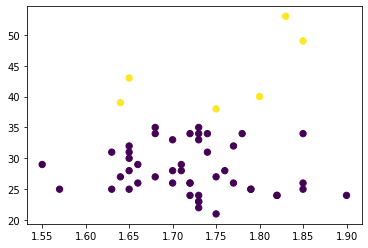

In [224]:
dataGMM1 = data.copy()
dataGMM1 = GMM_clustering(dataGMM1, 2)
plt.scatter(dataGMM1.values[:,0], dataGMM1.values[:,1], c=dataGMM1['label'].values, s=40, cmap='viridis')

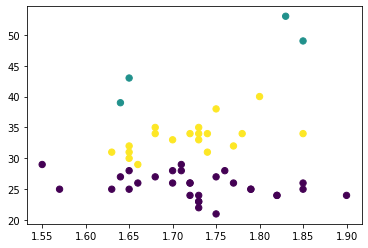

In [225]:
dataGMM2 = data.copy()
dataGMM2 = GMM_clustering(dataGMM2, 3)
plt.scatter(dataGMM2.values[:,0], dataGMM2.values[:,1], c=dataGMM2['label'].values, s=40, cmap='viridis')

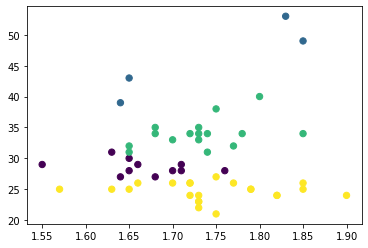

In [226]:
dataGMM3 = data.copy()
dataGMM3 = GMM_clustering(dataGMM3, 4)
plt.scatter(dataGMM3.values[:,0], dataGMM3.values[:,1], c=dataGMM3['label'].values, s=40, cmap='viridis')

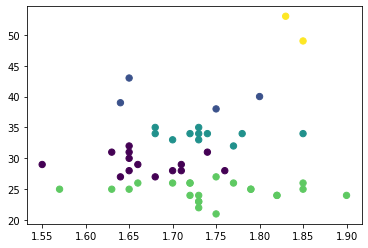

In [227]:
dataGMM4 = data.copy()
dataGMM4 = GMM_clustering(dataGMM4, 5)
plt.scatter(dataGMM4.values[:,0], dataGMM4.values[:,1], c=dataGMM4['label'].values, s=40, cmap='viridis')

#####Se toma k=3 ya que es como mejor parecieran agruparse los datos tanto para el algoritmo K-means como para GMM. Al analizar los centroides generados se podria asignar una categoria a cada uno de acuerdo a la edad.

### Metodo del codo

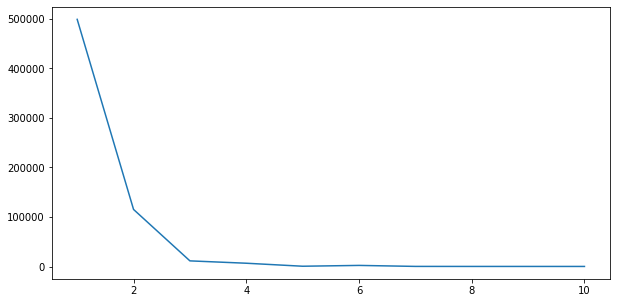

In [229]:
erroresTotal = []
n = 10

for i in range(n):
    _,errorIter, _ = kmeans(dataKmeansk1.drop(['centroide'], axis = 1),i+1) 
    erroresTotal.append(errorIter)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), erroresTotal)

Se puede observar en la gráfica que para este problema se puede aplicar el metodo del codo, y da como resultado elegir k=3

###Utilizando datos valtest(normales)

In [230]:
dataTest = pd.read_csv("/content/valtest.csv")
dataTest

,Estatura(metros),Edad(años)
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30
5,1.76,32
6,1.79,31
7,1.61,31


In [231]:
colors = {0:'red', 1:'blue', 2:'green', 3:'purple', 4:'black'}

#####Cluster asignado con K-Means

,Estatura(metros),Edad(años),centroide
0,1.82,25,2
1,1.80,27,2
2,1.60,31,1
3,1.60,35,1
4,1.82,30,1
5,1.76,32,1
6,1.79,31,1
7,1.61,31,1


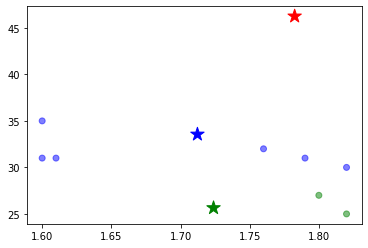

In [235]:
dataKmeansTest =  dataTest.copy()
dataKmeansTest['centroide'], et = asignarCentroide(dataKmeansTest,centroidesList2)

plt.scatter(dataKmeansTest.iloc[:,0], dataKmeansTest.iloc[:,1],  marker = 'o', c = dataKmeansTest['centroide'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroidesList2.iloc[:,0], centroidesList2.iloc[:,1],  marker = '*', s=200, 
           c = centroidesList2.index.map(lambda x: colors[x]))
dataKmeansTest

#####Probabilidad de pertenecer a cada cluster segun GMM

In [236]:
dataGMMTest = dataTest.copy()
gmm = GaussianMixture(n_components=3, random_state=0).fit(data.values)
probs = gmm.predict_proba(dataGMMTest.values)
pd.DataFrame(probs)

,0,1,2
0,0.999993,3.689823e-30,0.000007
1,0.998591,1.858700e-23,0.001409
2,0.213116,4.373455e-04,0.786446
3,0.001454,4.145569e-01,0.583989
4,0.584372,2.466890e-18,0.415628
5,0.004556,1.652430e-11,0.995444
6,0.056823,1.245941e-14,0.943177
7,0.168180,1.544613e-04,0.831665


###GMM para estimar valor esperado de la funcion f

In [237]:
def f(X):
  x1 = X[:,0]
  x2 = X[:,1]
  return x1/x2

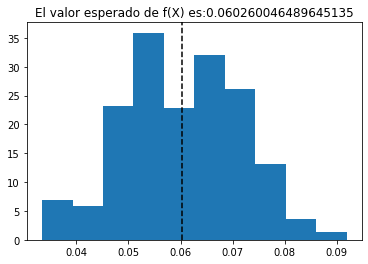

In [238]:
muestra,cluster = gmm.sample(1000)
muestra_f = f(muestra)
valor_esperado_f = np.mean(muestra_f)

plt.hist(muestra_f, density=True)
plt.axvline(valor_esperado_f,color="k",linestyle="--")
plt.title("El valor esperado de f(X) es:{}".format(valor_esperado_f))

plt.show()